In [ ]:
!nvidia-smi

Fri May 17 23:23:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9


Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 11.80 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00


In [ ]:
!pip install -r requirements.txt -q
!pip install Pillow==9.5.0

In [ ]:
#%cd yolov9
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!unzip box_data.zip

Archive:  box_data.zip
  inflating: box_data/data.yaml      
   creating: box_data/test/
   creating: box_data/test/images/
  inflating: box_data/test/images/01.jpg  
  inflating: box_data/test/images/02.jpg  
  inflating: box_data/test/images/03.jpg  
  inflating: box_data/test/images/04.jpg  
  inflating: box_data/test/images/05.jpg  
  inflating: box_data/test/images/06.jpg  
  inflating: box_data/test/images/07.jpg  
  inflating: box_data/test/images/08.jpg  
  inflating: box_data/test/images/09.jpg  
  inflating: box_data/test/images/10.jpg  
  inflating: box_data/test/images/100.jpg  
 extracting: box_data/test/images/11.jpg  
  inflating: box_data/test/images/12.jpg  
  inflating: box_data/test/images/13.jpg  
  inflating: box_data/test/images/14.jpg  
  inflating: box_data/test/images/15.jpg  
 extracting: box_data/test/images/16.jpg  
  inflating: box_data/test/images/17.jpg  
  inflating: box_data/test/images/18.jpg  
  inflating: box_data/test/images/19.jpg  
  inflating: bo

In [ ]:
!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data box_data/data.yaml \
--weights weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2024-05-17 23:26:54.100874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 23:26:54.100921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 23:26:54.102309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 23:26:55.998695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=box_data/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=Fals

In [ ]:
!ls runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1715988417.e6a95456079d.2145.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


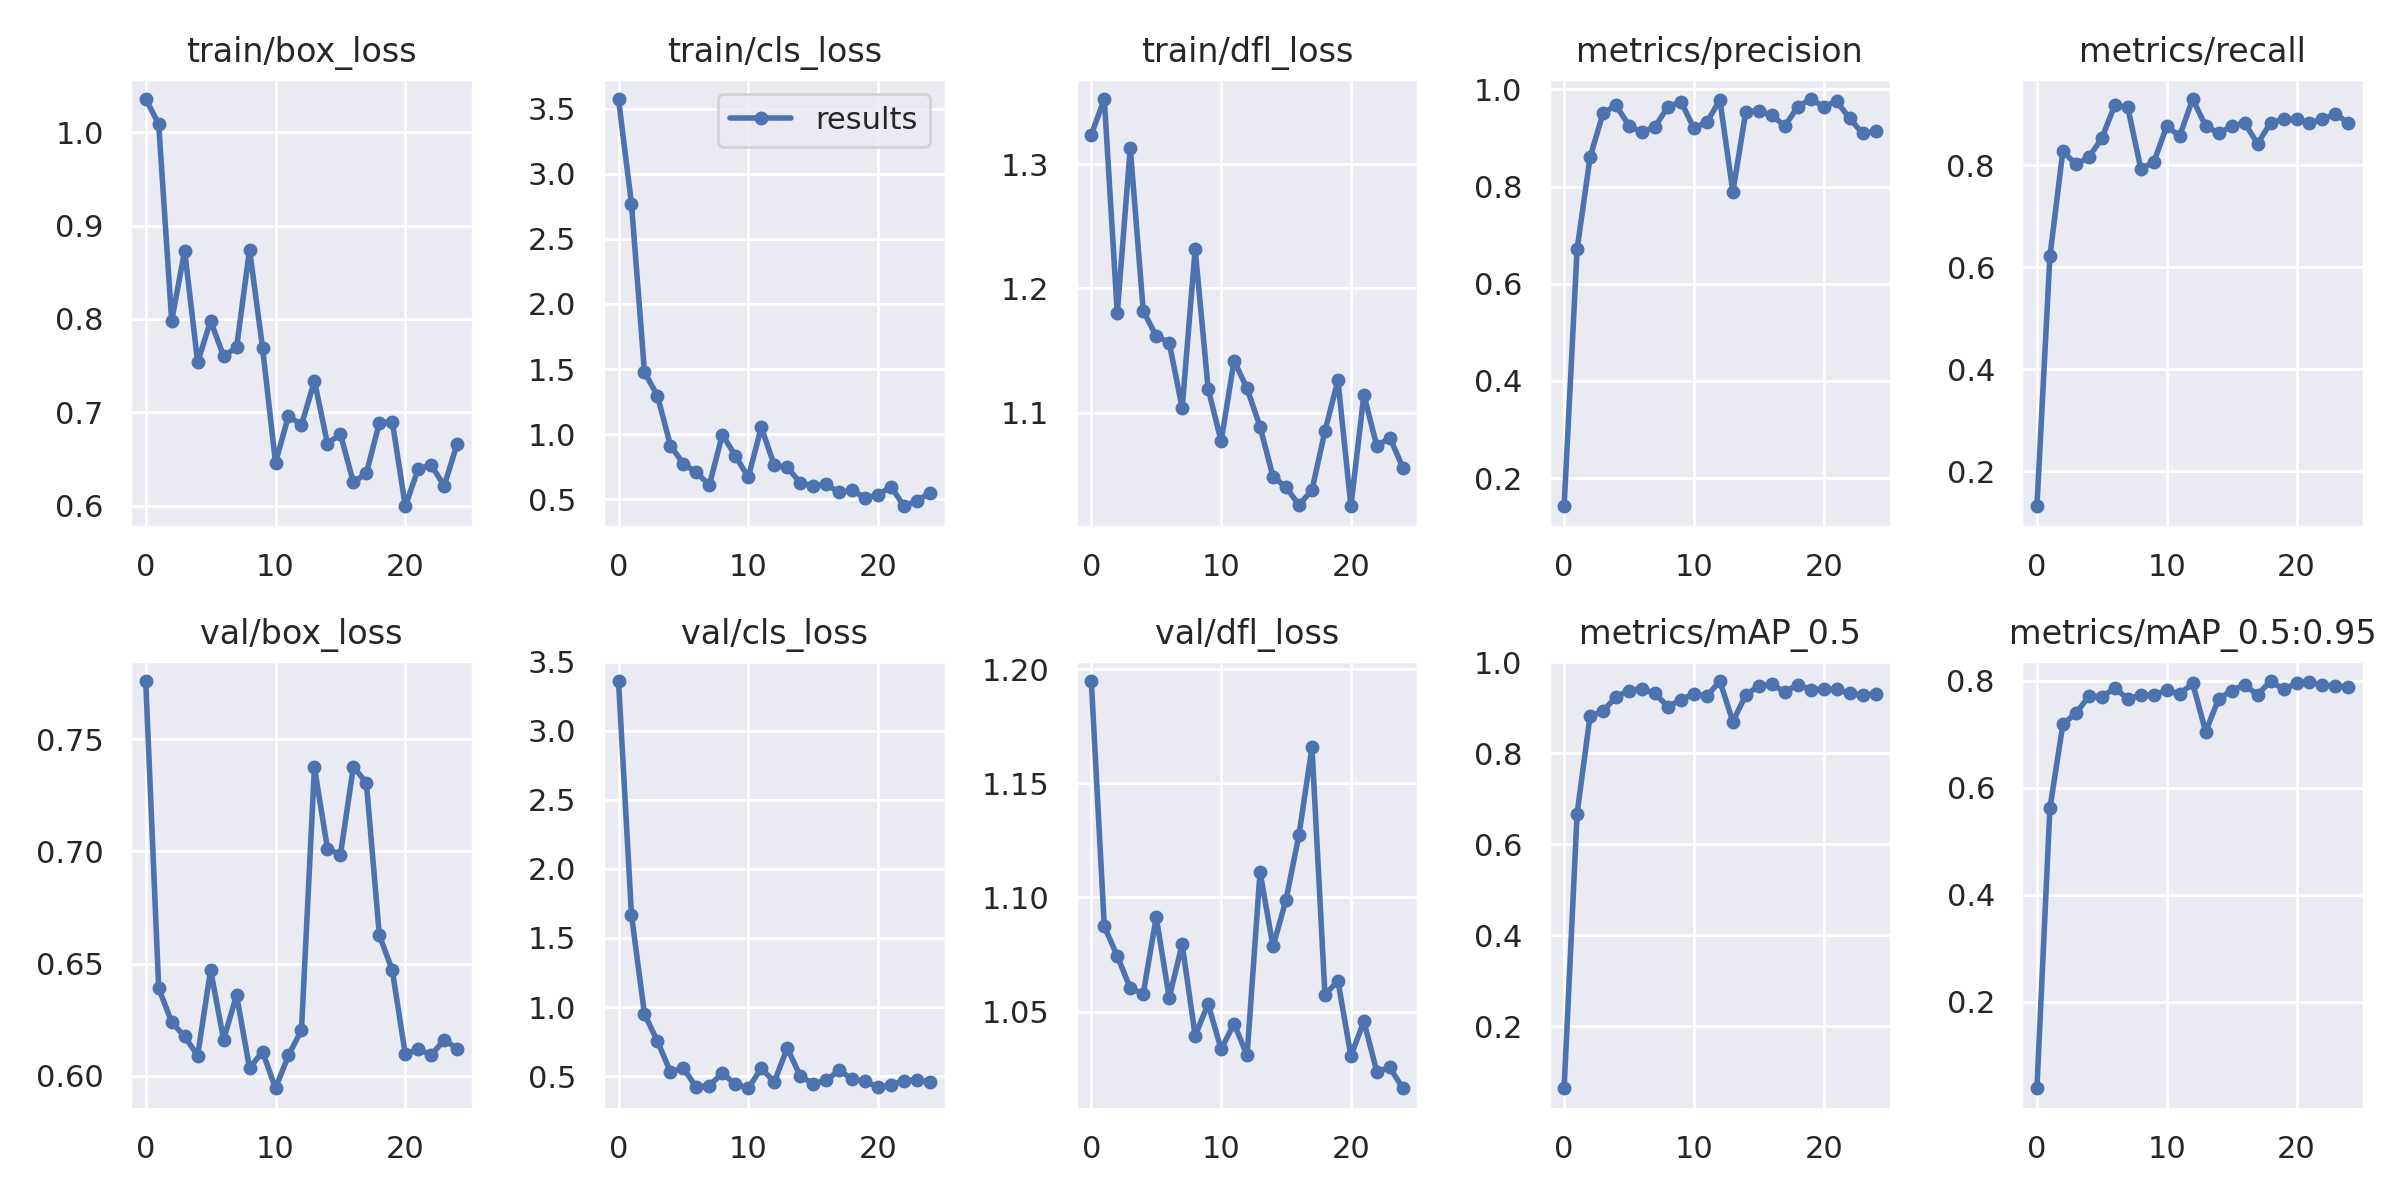

In [ ]:
from IPython.display import Image

Image(filename=f"runs/train/exp/results.png", width=1000)

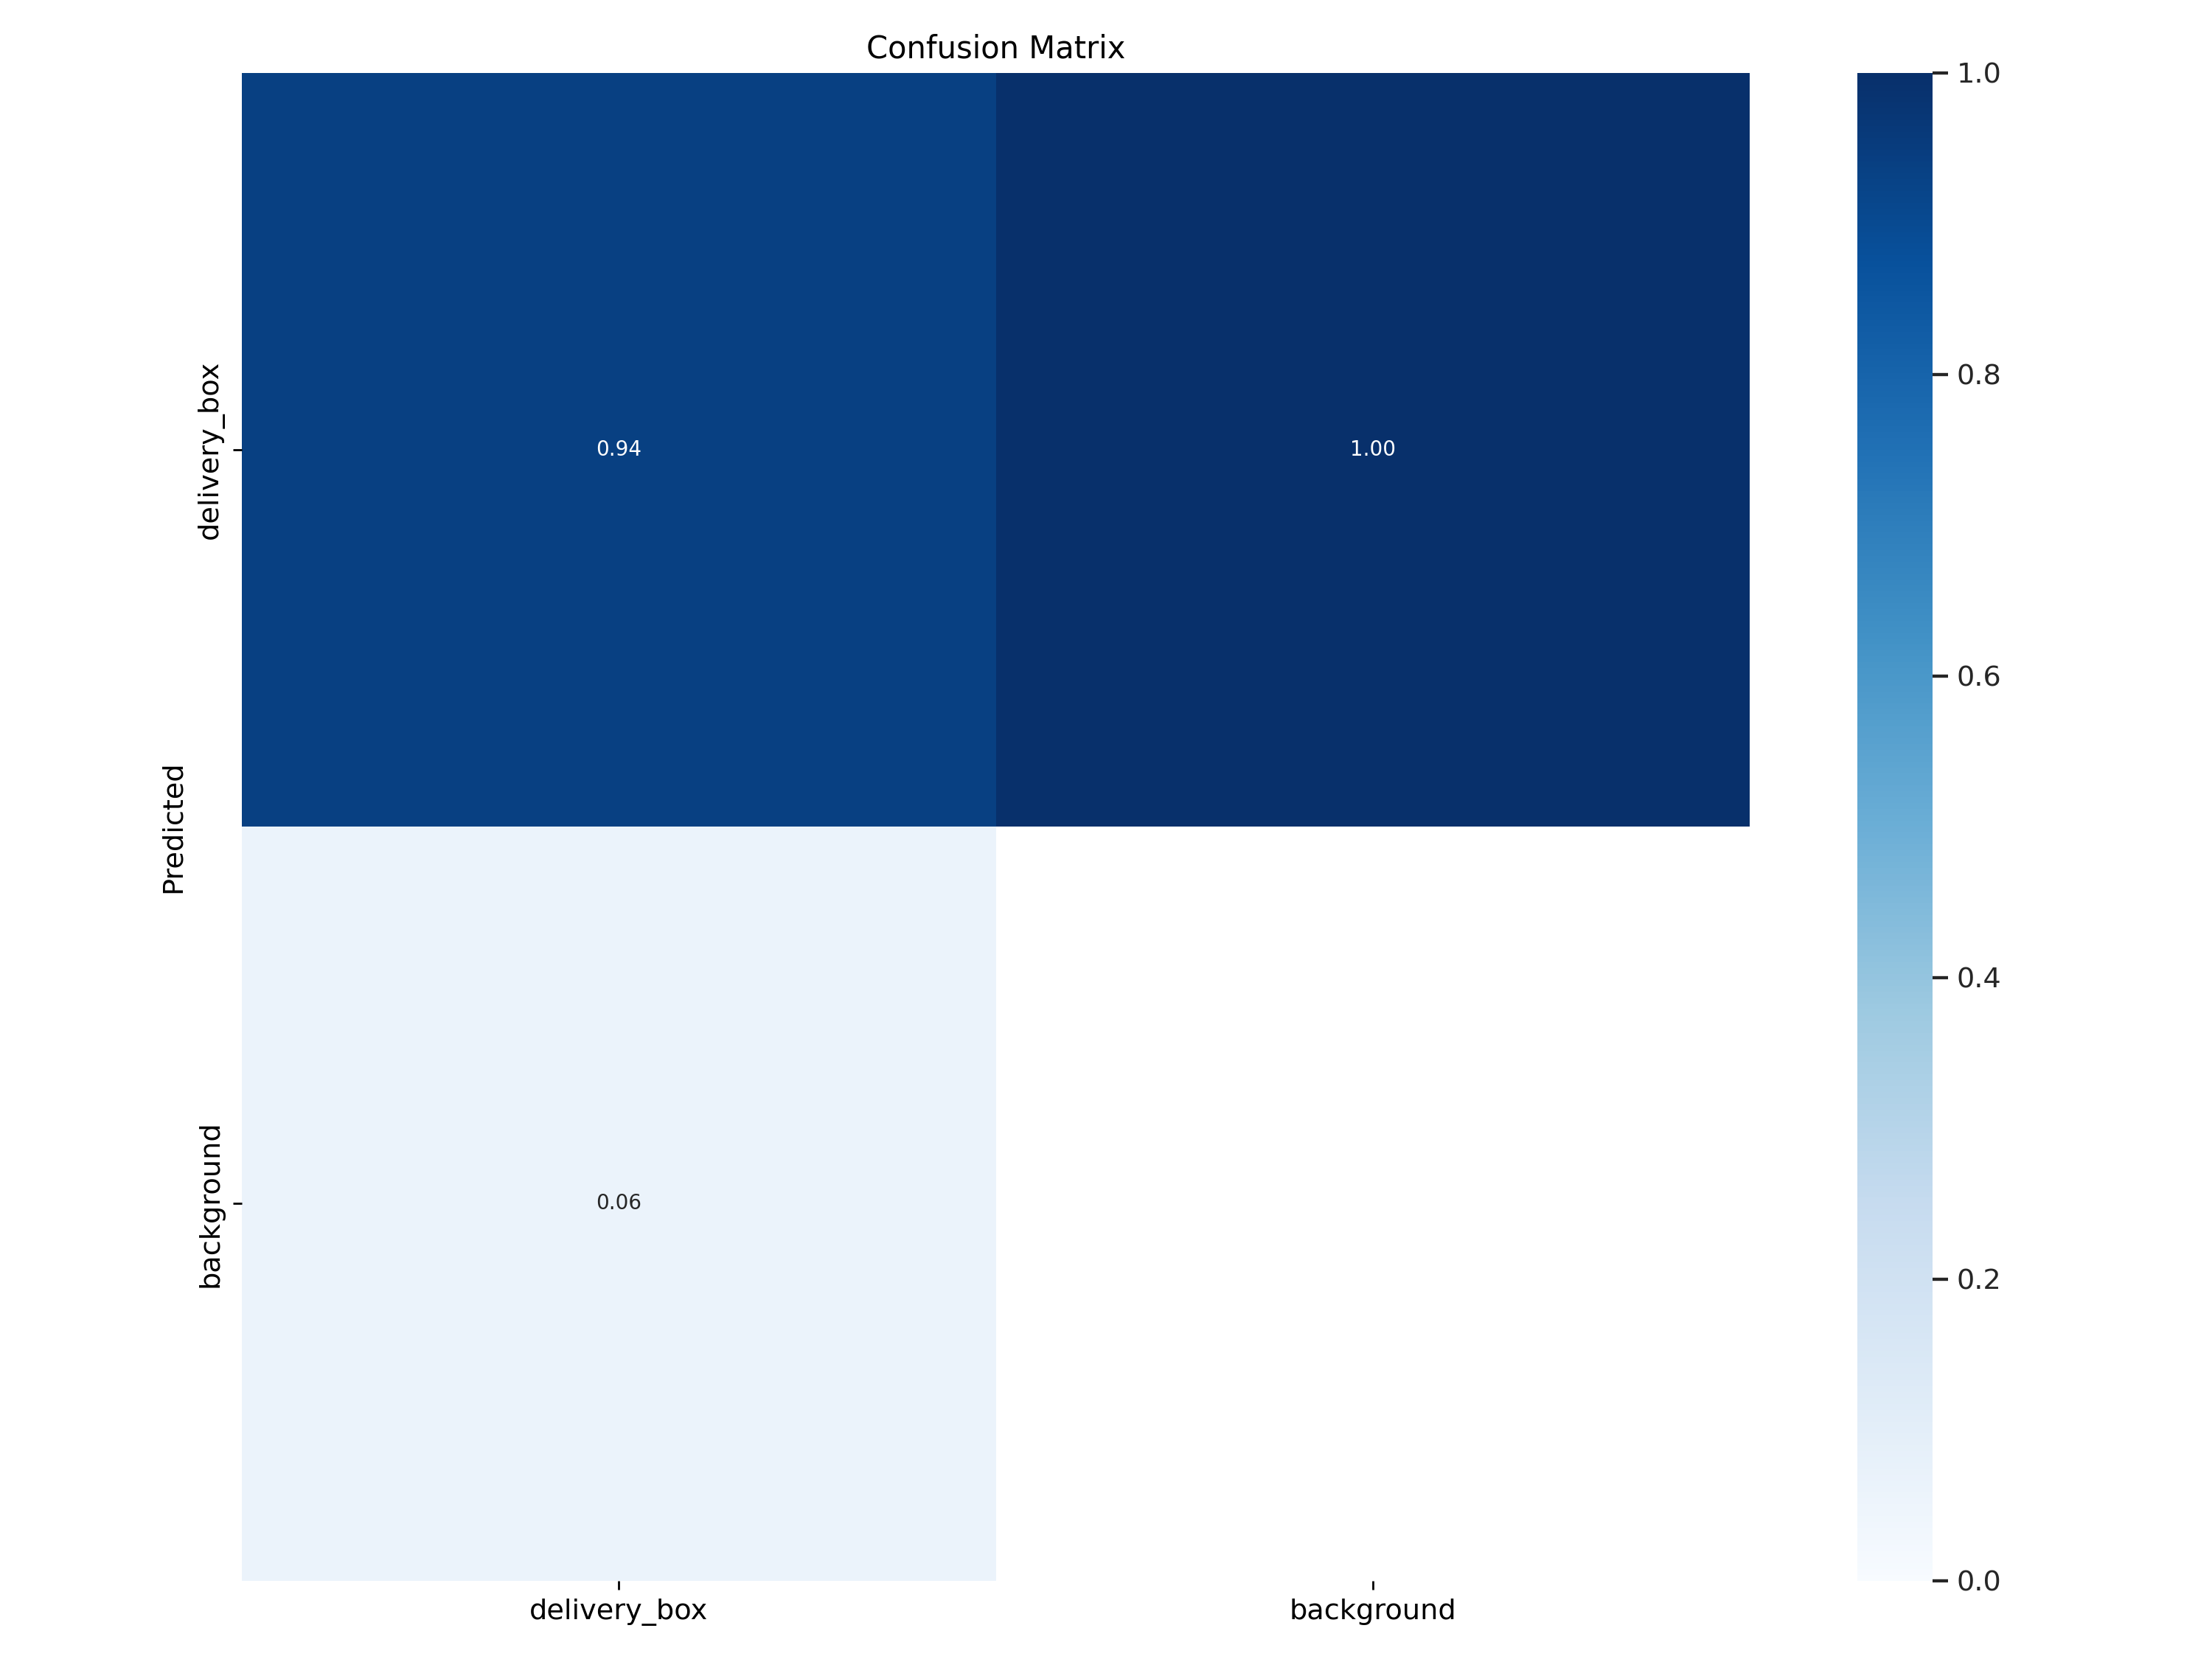

In [ ]:
from IPython.display import Image

Image(filename=f"runs/train/exp/confusion_matrix.png", width=1000)

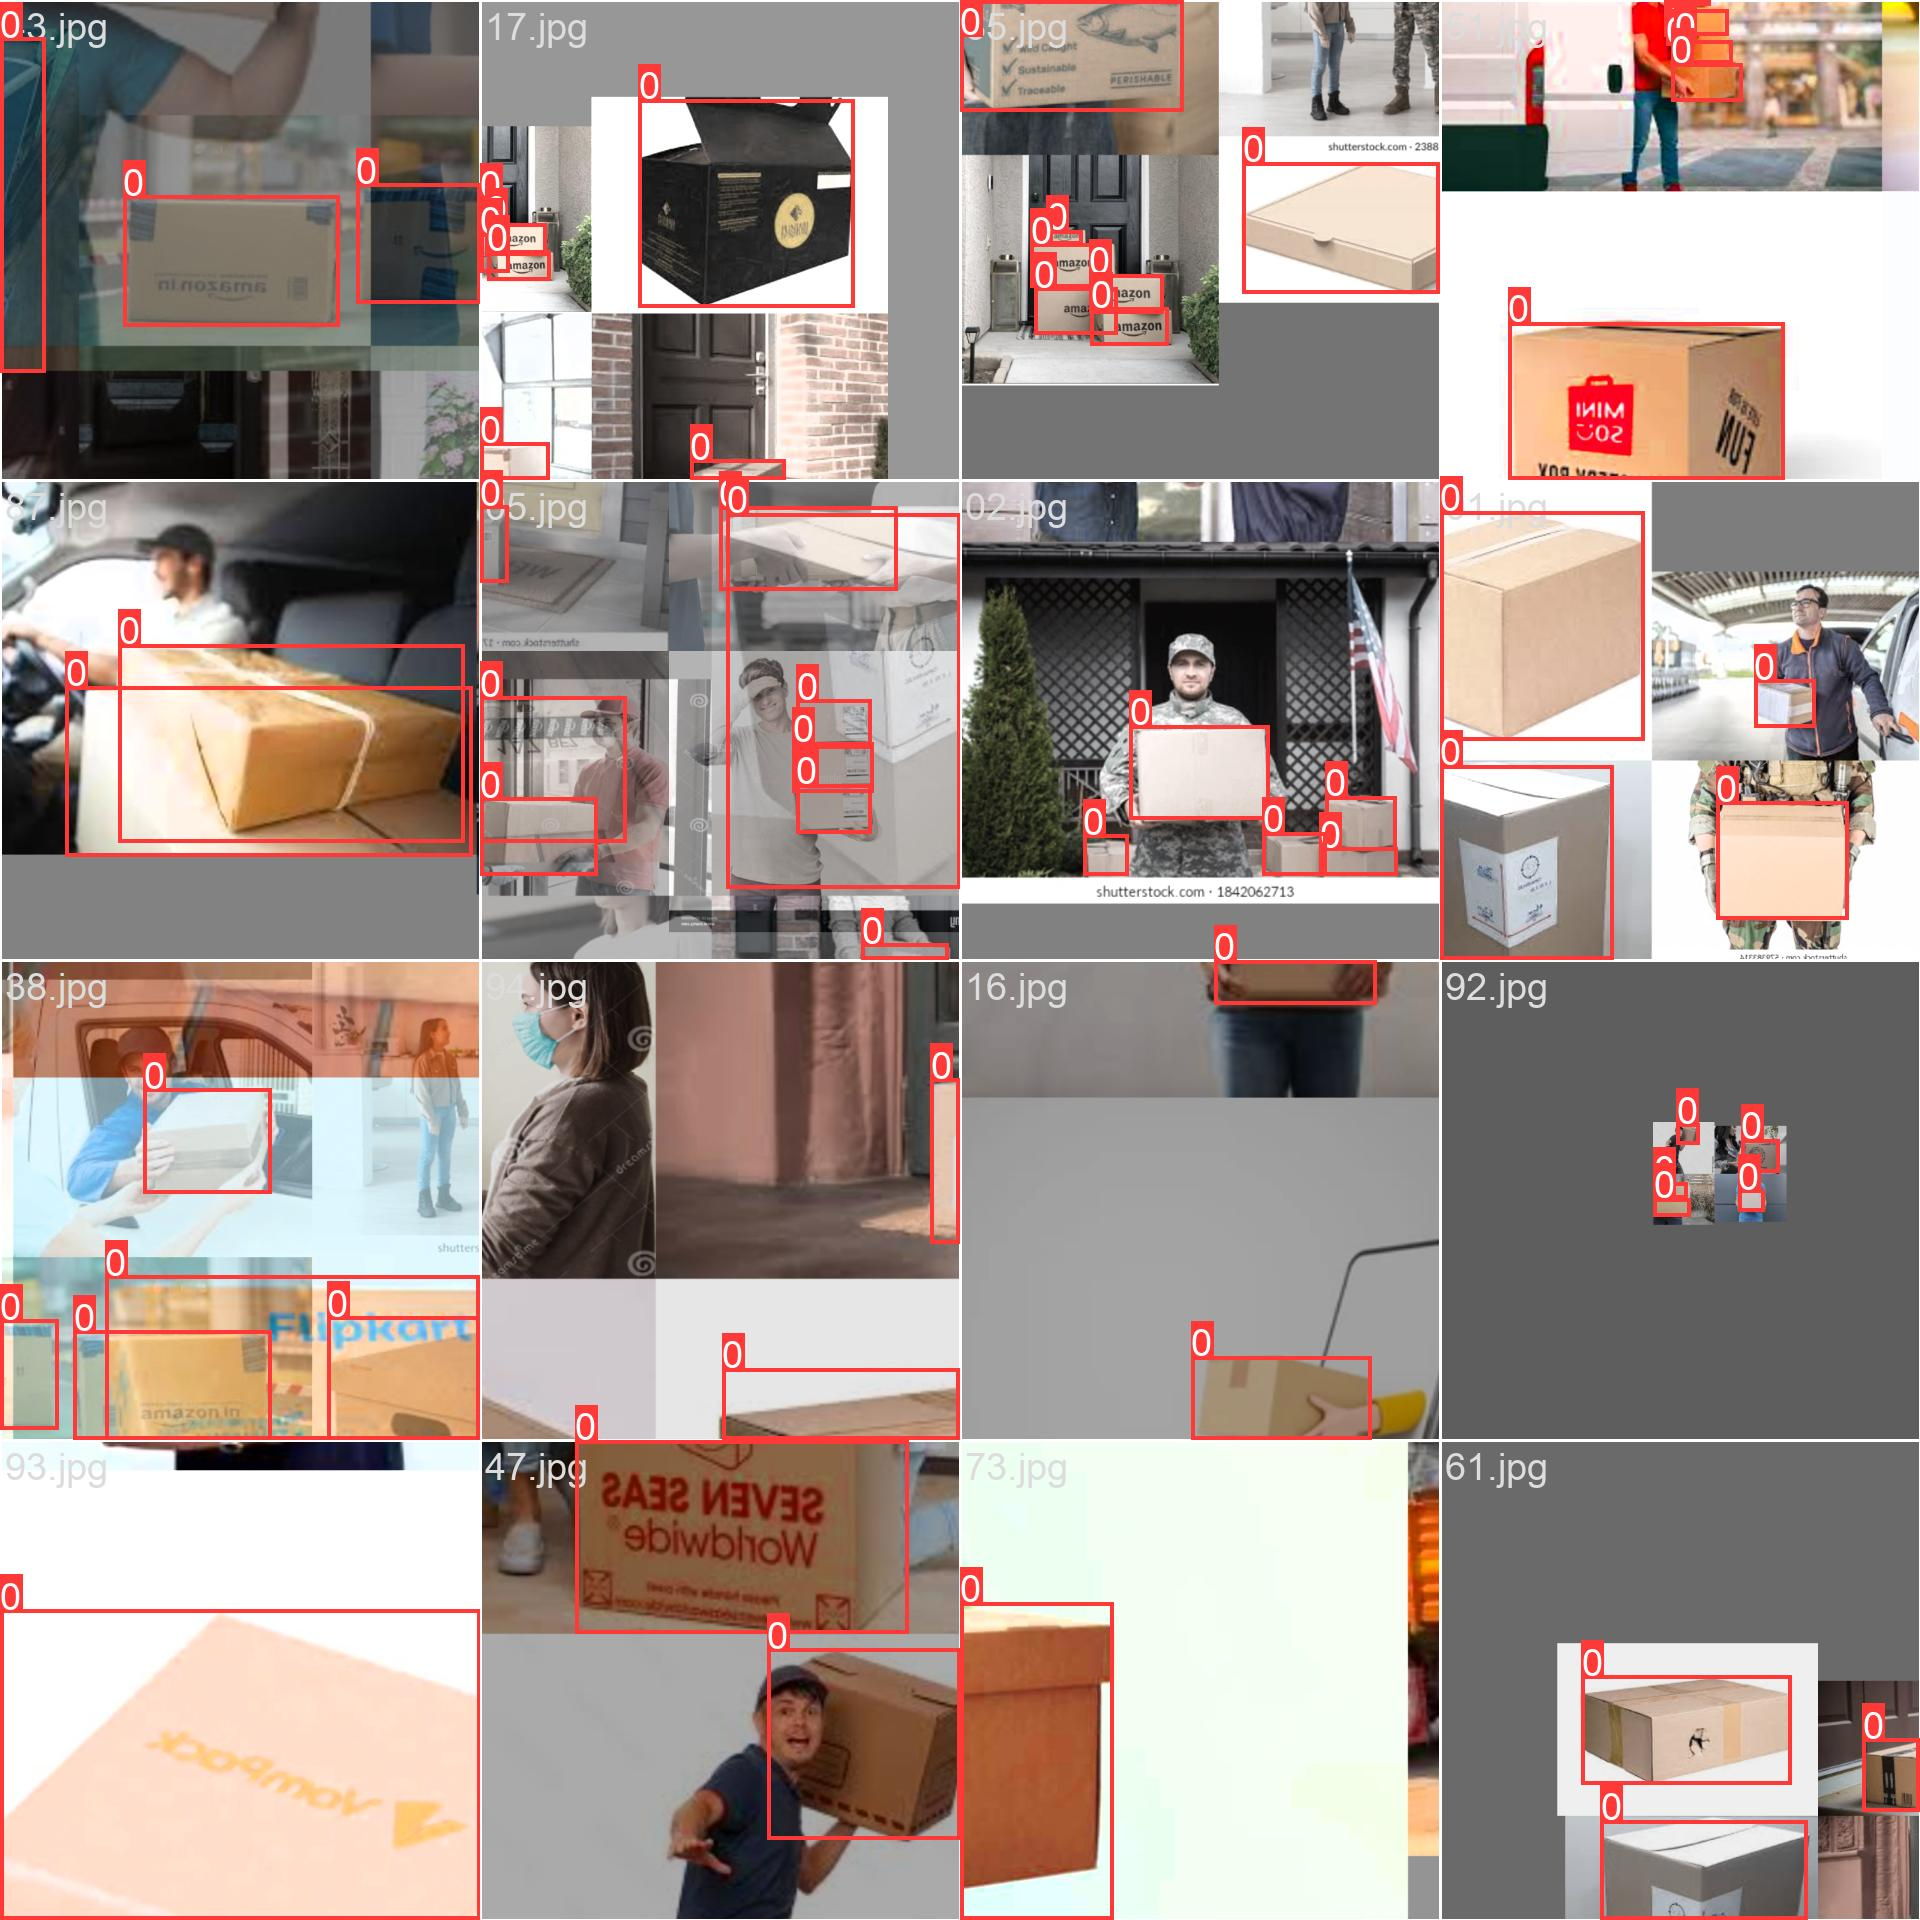

In [12]:
from IPython.display import Image

Image(filename=f"runs/train/exp/train_batch0.jpg", width=1000)

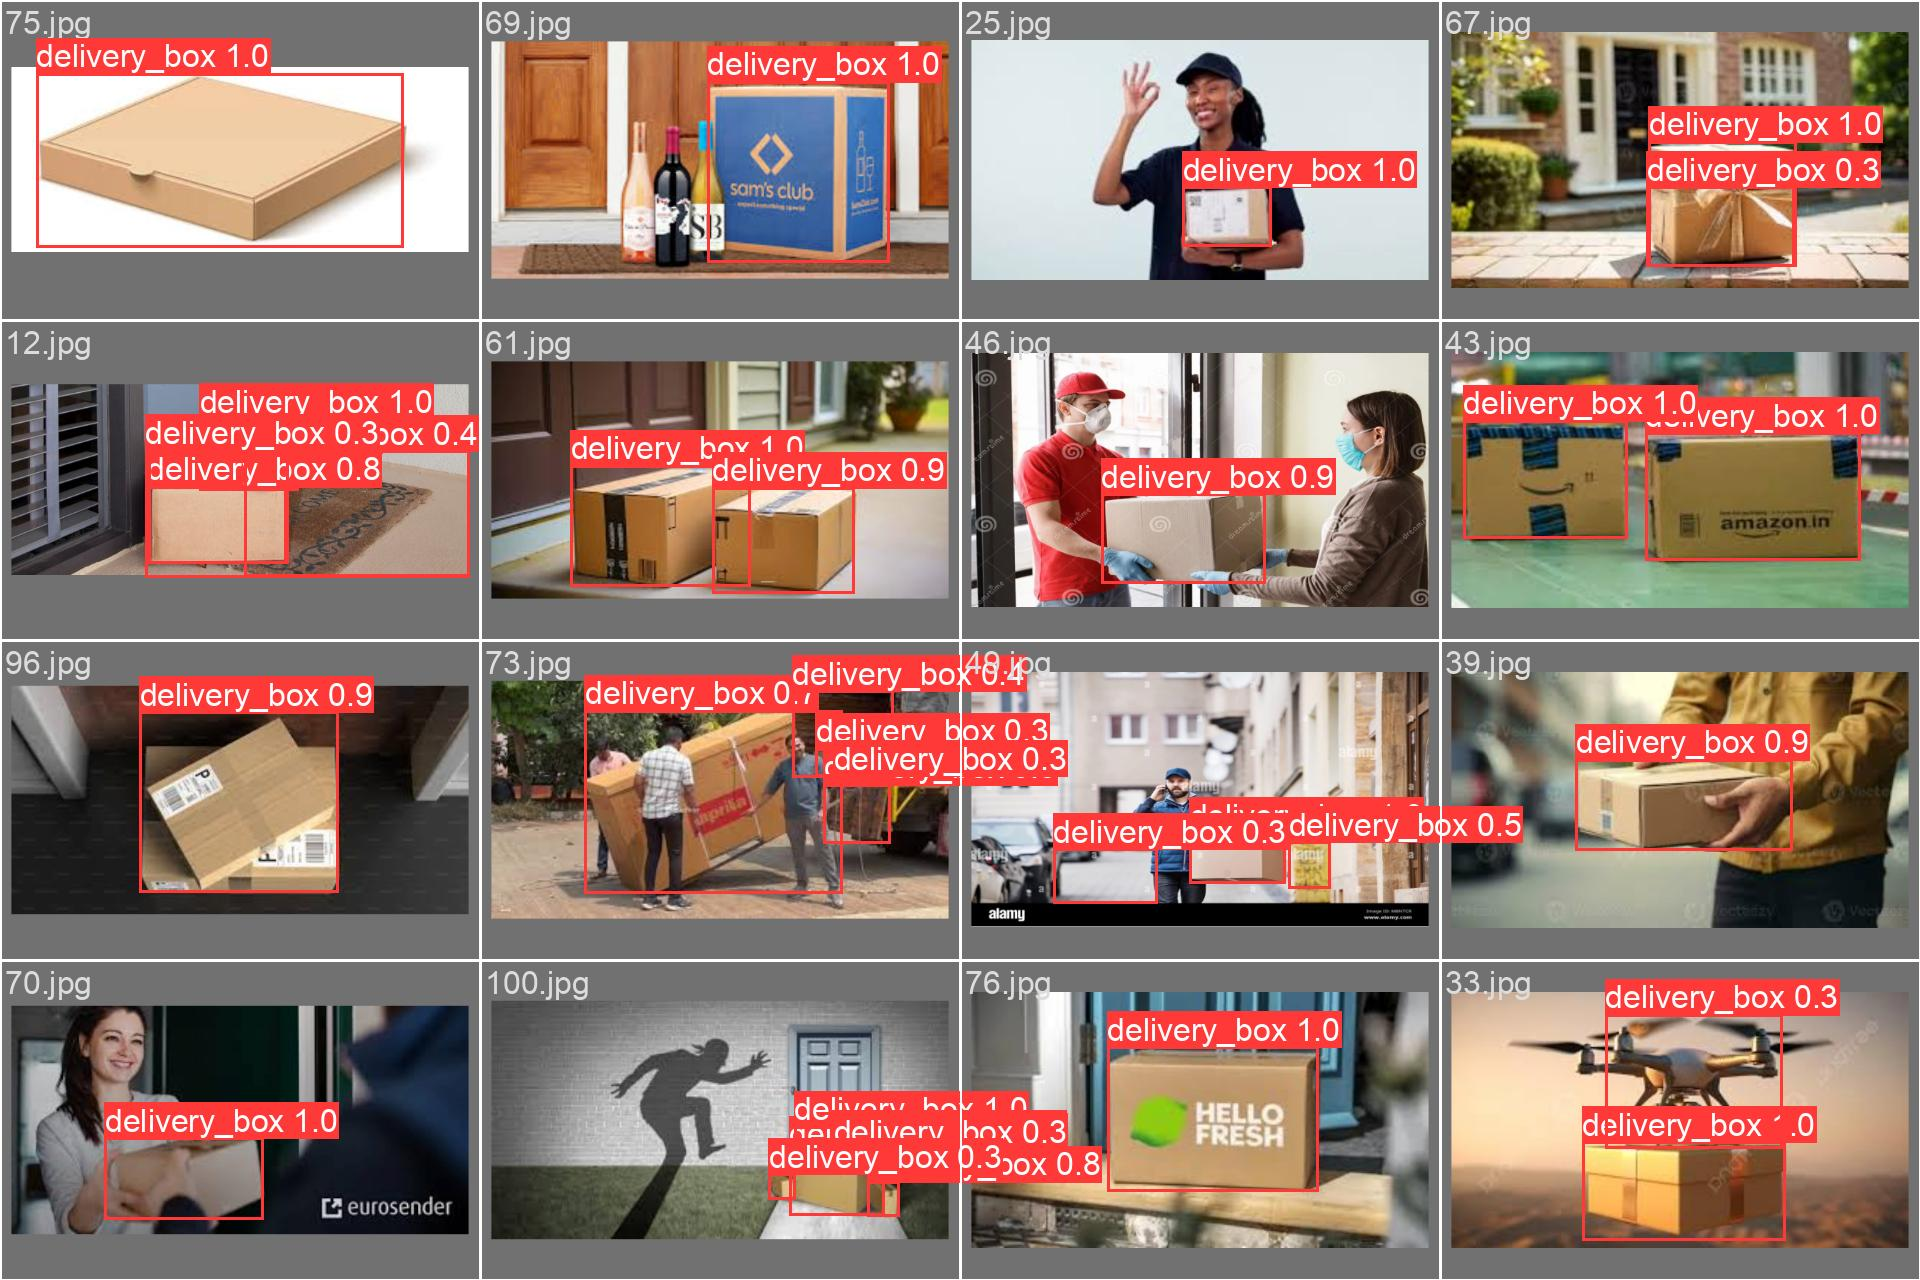

In [ ]:
from IPython.display import Image

Image(filename=f"runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
#%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data box_data/data.yaml \
--weights runs/train/exp/weights/best.pt

val: data=box_data/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/box_data/val/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 